In [2]:
#pip install tensorflow==1.15
#Install stable-baselines as described in the documentation

import gym
import gym_pcgrl

from stable_baselines.common.policies import MlpPolicy, CnnPolicy, FeedForwardPolicy
from stable_baselines.common.vec_env import SubprocVecEnv, DummyVecEnv
from stable_baselines.a2c.utils import conv, linear, conv_to_fc
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import PPO2

import tensorflow as tf
import numpy as np

import pdb

class PCGRL(gym.Wrapper):
    def __init__(self, game):
        self.env = gym.make(game)
        gym.Wrapper.__init__(self, self.env)

        #self.observation_space = gym.spaces.Box(low=0, high=1, shape=(198,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(14, 14, 2), dtype=np.uint8)

    def step(self, action):
        action = action.item()
        obs, reward, done, info = self.env.step(action)
        obs = self.transform(obs)
        return obs, reward, done, info

    def reset(self):
        obs = self.env.reset()
        obs = self.transform(obs)
        return obs

    def transform(self, obs):
        #flatten
        #map = obs['map'].flatten()
        #pos = obs['pos']/168
        #return np.concatenate([map, pos])

        #image
        map = obs['map']
        x, y = obs['pos']
        pos = np.zeros_like(map)
        pos[y][x] = 1
        return np.stack([map, pos], 2)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



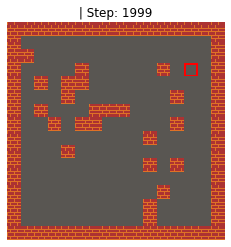

NAAAAAAY
[{'regions': 1, 'path-length': 26}]


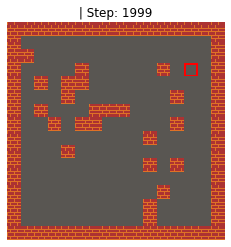

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

def show_state(env, step=0, name="", info=""):
    plt.figure(10)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("{} | Step: {} {}".format(name, step, info))
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())

def get_env():
    env = PCGRL("binary-narrow-v0")
    env.env.adjust_param(random_tile=False)
    return env

env = DummyVecEnv([get_env])
# model = PPO2(CustomPolicy, env, verbose=1, tensorboard_log="./runs")
model = PPO2.load("ppo_binary")

# Enjoy trained agent
obs = env.reset()
for i in range(2000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    if i == 0:
        print(info)
    show_state(env, i)
    if dones:
        print("YAAAAAAAAAAAAAY")
        break
print("NAAAAAAY")
print(info)